In [1]:
import turboprop as tp
from nn import Sequential, Dense

In [2]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.1)
y = y * 2 - 1 # make it -1 or 1
print(X.shape, y.shape)

(100, 2) (100,)


In [3]:
import matplotlib.pyplot as plt

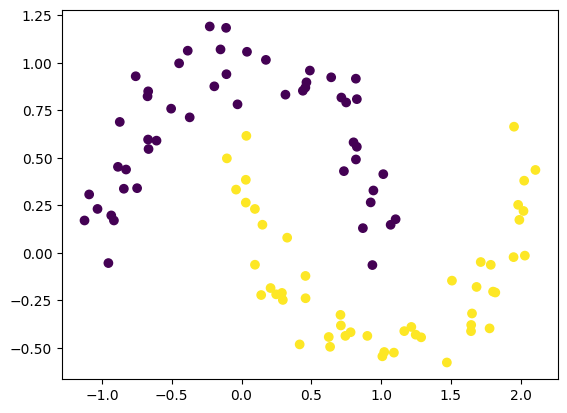

In [4]:
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], c=y)

In [68]:
model = Sequential([
    Dense(2, 16),
    Dense(16, 16),
    Dense(16, 1)
    ])

In [69]:
def get_loss():
    loss = 0
    acc = 0
    for ind in range(X.shape[0]):
        x = X[ind]
        y_true = y[ind]
        y_pred = model(x)[0]

        #loss += -(y * y_pred.log() + (1 - y) * (1 - y_pred).log())
        # svm "max-margin" loss
        loss += (1 + (y_pred * -y_true)).relu()
        acc += (y_true > 0) == (y_pred.value > 0)

    return loss / X.shape[0], acc / X.shape[0]


In [72]:
n_epoch = 100
alpha = 1e-2
for epoch in range(n_epoch):
    model.zero_grad()
    loss, acc = get_loss()
    if epoch % 5 == 0:
        print(f'{loss=}, {acc=}')
    loss.backward()
    for p in model.parameters():
        p.value -= alpha * p.grad




loss=Scalar(0.6097834223850515), grad=0, acc=0.89
loss=Scalar(0.6096804808950583), grad=0, acc=0.88
loss=Scalar(0.6096134895132059), grad=0, acc=0.89
loss=Scalar(0.6095518577067657), grad=0, acc=0.88
loss=Scalar(0.6094963470653648), grad=0, acc=0.87
loss=Scalar(0.6094589178987648), grad=0, acc=0.87
loss=Scalar(0.6093888315108882), grad=0, acc=0.88
loss=Scalar(0.6093402983940925), grad=0, acc=0.89
loss=Scalar(0.6092967125975856), grad=0, acc=0.89
loss=Scalar(0.6092452579584338), grad=0, acc=0.87
loss=Scalar(0.6091856020895373), grad=0, acc=0.89
loss=Scalar(0.6091219500744657), grad=0, acc=0.89
loss=Scalar(0.6090762004658239), grad=0, acc=0.89
loss=Scalar(0.6090084361298538), grad=0, acc=0.89
loss=Scalar(0.6089591951325204), grad=0, acc=0.87
loss=Scalar(0.6088962794155939), grad=0, acc=0.89
loss=Scalar(0.6088453488745088), grad=0, acc=0.87
loss=Scalar(0.6087865789127358), grad=0, acc=0.89
loss=Scalar(0.6087368738793274), grad=0, acc=0.87
loss=Scalar(0.6086757781507102), grad=0, acc=0.89
